In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [204]:
state_changes_info = pd.read_csv("data/Product State Changes from BSS.csv")

state_changes_info

,PRODUCT_LABEL,PRODUCT_LABEL.hash,CUSTOMER_REF,CUSTOMER_REF.hash,ACCOUNT_NUM,ACCOUNT_NUM.hash,PRODUCT_SEQ,START_DAT,END_DAT,PRODUCT_ID,PRODUCT_NAME,EFFECTIVE_DTM,PRODUCT_STATUS
0,112380077,b635fc31617ffc9c1e6b5015fb32e108,CR003493315,3bab8adf192d3b98fc879ad65bf3b1a8,0039107652,a4e4afaedb57f205bfeff624c39fe49d,250,2019-Feb-28 00:00:00,2019-Jun-18 00:00:00,2076,V_Single VAS Bundle,2019-Jun-19 00:00:00,TX
1,412244863,ef74b1171331411a4d2e9fada9158215,CR004101454,395dd9f2747c6fa4336ee794b1cb6d72,0044218857,9c802b6b329dc1e3ba6e6c655a21e65d,14,2019-Dec-19 00:00:00,2020-Jan-18 00:00:00,2693,E_Referral offer Discount,2020-Jan-19 00:00:00,TX
2,112410723,31110bf10f07e3d5e23da9680b1dd287,CR000806265,f72dffa8e0e57e2999859d05fb470b8e,0032400207,1cf3f313f1060c69dfe814a0e8124f18,51,2018-Aug-01 00:00:00,2019-Oct-06 00:00:00,2176,V_Absentee service,2019-Oct-06 09:32:00,TX
3,212061808,b6404a24d0ae0f5dbb11c78c783bd1fc,CR002669085,71a467201a2d56926e6f9e3b162635a5,0031020080,ce8d936fed762bfa12912fb18915b802,93,2018-Sep-21 00:00:00,2019-Jun-29 00:00:00,2173,V_Hotline Service,2019-Jun-29 13:57:00,TX
4,112380077,b635fc31617ffc9c1e6b5015fb32e108,CR003493315,3bab8adf192d3b98fc879ad65bf3b1a8,0039107652,a4e4afaedb57f205bfeff624c39fe49d,252,2019-Feb-28 00:00:00,2019-Jun-18 00:00:00,2165,V_Caller Line Identification,2019-Jun-19 00:00:00,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,34,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,2123,V_DQ Contact Details,2019-Apr-05 10:11:00,TX
3024,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,30,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,2042,AB_Megaline,2019-Apr-05 10:11:00,TX
3025,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,33,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,2044,AB_Megaline Startup,2019-Apr-05 10:11:00,TX
3026,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,35,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,1570,V_IDD,2019-Apr-05 10:11:00,TX


In [205]:
state_changes_info = state_changes_info.drop(['PRODUCT_LABEL','CUSTOMER_REF','CUSTOMER_REF.hash','ACCOUNT_NUM' ,'PRODUCT_STATUS','PRODUCT_ID','START_DAT','END_DAT','PRODUCT_SEQ'], axis=1)
state_changes_info.rename(columns={'PRODUCT_LABEL.hash': 'Phone_Number.hash'}, inplace=True)
state_changes_info

,Phone_Number.hash,ACCOUNT_NUM.hash,PRODUCT_NAME,EFFECTIVE_DTM
0,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,V_Single VAS Bundle,2019-Jun-19 00:00:00
1,ef74b1171331411a4d2e9fada9158215,9c802b6b329dc1e3ba6e6c655a21e65d,E_Referral offer Discount,2020-Jan-19 00:00:00
2,31110bf10f07e3d5e23da9680b1dd287,1cf3f313f1060c69dfe814a0e8124f18,V_Absentee service,2019-Oct-06 09:32:00
3,b6404a24d0ae0f5dbb11c78c783bd1fc,ce8d936fed762bfa12912fb18915b802,V_Hotline Service,2019-Jun-29 13:57:00
4,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,V_Caller Line Identification,2019-Jun-19 00:00:00
...,...,...,...,...
3023,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,V_DQ Contact Details,2019-Apr-05 10:11:00
3024,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,AB_Megaline,2019-Apr-05 10:11:00
3025,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,AB_Megaline Startup,2019-Apr-05 10:11:00
3026,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,V_IDD,2019-Apr-05 10:11:00


## Product List

In [206]:
def create_dict(keys,values):
    return [{k: v} for k, v in zip(keys, values)]

In [207]:
product_name_list = state_changes_info['PRODUCT_NAME'].unique()
product_name_list

array(['V_Single VAS Bundle', 'E_Referral offer Discount',
       'V_Absentee service', 'V_Hotline Service',
       'V_Caller Line Identification', 'V_Call Forwarding Offline',
       'V_Abbreviated Dialing', 'V_Call Transfer Three way',
       'V_Call Forwarding', 'V_Call Waiting',
       'V_Call Forwarding-Immediate', 'V_Outgoing Call Memory',
       'V_Call Forwarding-On Busy', 'V_Call Forwarding-No Answer',
       'V_Cordeless Phone - Installment', 'E_PeoTV Initiation',
       'V_Selective call acceptance', 'V_Hotline-Immediate',
       'V_Call holding', 'V_Hotline-Time Delayed',
       'V_Call Forwarding by time', 'V_Incoming Call Memory',
       'V_Short Message Service', 'M_Activation Charge',
       'E_Video on Demand', 'AB_Megaline', 'E_TSTV',
       'V_Secretary service', 'V_Call park', 'V_Selective call rejection',
       'V_Call back on busy', 'V_Call Forwarding - Immediate',
       'V_Anonymous call barring', 'V_Call Forwarding - On Busy',
       'V_Incoming Call Transfer'

In [208]:
product_list = create_dict(state_changes_info['Phone_Number.hash'],state_changes_info['PRODUCT_NAME'])
product_list

[{'b635fc31617ffc9c1e6b5015fb32e108': 'V_Single VAS Bundle'},
 {'ef74b1171331411a4d2e9fada9158215': 'E_Referral offer Discount'},
 {'31110bf10f07e3d5e23da9680b1dd287': 'V_Absentee service'},
 {'b6404a24d0ae0f5dbb11c78c783bd1fc': 'V_Hotline Service'},
 {'b635fc31617ffc9c1e6b5015fb32e108': 'V_Caller Line Identification'},
 {'b6404a24d0ae0f5dbb11c78c783bd1fc': 'V_Absentee service'},
 {'b635fc31617ffc9c1e6b5015fb32e108': 'V_Call Forwarding Offline'},
 {'31110bf10f07e3d5e23da9680b1dd287': 'V_Abbreviated Dialing'},
 {'b6404a24d0ae0f5dbb11c78c783bd1fc': 'V_Abbreviated Dialing'},
 {'b635fc31617ffc9c1e6b5015fb32e108': 'V_Abbreviated Dialing'},
 {'b6404a24d0ae0f5dbb11c78c783bd1fc': 'V_Call Transfer Three way'},
 {'31110bf10f07e3d5e23da9680b1dd287': 'V_Call Transfer Three way'},
 {'b6404a24d0ae0f5dbb11c78c783bd1fc': 'V_Call Forwarding'},
 {'31110bf10f07e3d5e23da9680b1dd287': 'V_Call Forwarding'},
 {'b635fc31617ffc9c1e6b5015fb32e108': 'V_Call Forwarding'},
 {'b6404a24d0ae0f5dbb11c78c783bd1fc': 'V_

## Analysis

- 1. group by Account-num
- 2. group products purchased by cutomers

In [211]:
state_df.isnull().sum(axis=0)

Phone_Number.hash    0
ACCOUNT_NUM.hash     0
PRODUCT_NAME         0
EFFECTIVE_DTM        0
Product_Count        0
dtype: int64

In [212]:
list_df = state_df.drop('Product_Count', axis=1).groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)
list_df

,ACCOUNT_NUM.hash,Phone_Number.hash,PRODUCT_NAME,EFFECTIVE_DTM
0,0009e7e4d940c2a539b89342af07e7f1,[5e411c13c17e851e8cdf6fbdcc10537a],[AB_Service Vacation],[2019-Oct-29 12:01:02]
1,008bca99f0cccb5d07d4f03744709cf8,[ba3e4a690c1d811b4192005e480bcd55],[V_Installment],[2020-Jun-15 00:00:00]
2,01cbc9b050fa000d1de651103cd30fc3,"[70d7089a840256ad28912710e9cdc608, 70d7089a840...","[E_PeoTV Initiation, E_Video on Demand, E_TSTV]","[2019-Feb-13 08:41:00, 2019-Feb-13 08:41:00, 2..."
3,02059e815d999bda708149ae263946d3,"[a554cc1065efdea68627e133958bca32, a554cc1065e...","[V_Call Forwarding - Immediate, V_Call Forward...","[2019-Jun-13 09:34:00, 2019-Jun-13 09:34:00, 2..."
4,026368f4bccda09644665c13cbe13079,"[b0247cfa960b7d693a0e3e7d8e1eebd7, b0247cfa960...","[E_PeoTV Initiation, E_Video on Demand, E_TSTV...","[2020-Feb-11 11:51:00, 2020-Feb-11 11:51:00, 2..."
...,...,...,...,...
409,fd3b30118c8c6faa2ba4dc83e1f35bab,"[76d2be98265496481fa8ed9700e256fe, 76d2be98265...","[V_Call back on busy, V_Call holding, V_Call F...","[2019-Jun-26 16:03:00, 2019-Jun-26 16:03:00, 2..."
410,fdf274d421e09f7677f3b579d45aa60b,"[d9f57e2dfadee74f1bc968513e2ad476, d9f57e2dfad...","[V_Call holding, V_Incoming Call Memory, V_Inc...","[2020-Jan-31 17:50:00, 2020-Jan-31 17:50:00, 2..."
411,fea406eb917dcb3f3e93fec553e5d897,[7961eca52aa61ed953d0dff1a2a5a390],[AB_Relocation],[2020-Mar-02 00:00:00]
412,ff0f03a90ae06a091ac177504385e69a,"[ab7fe1473cfcfcc995de024aa4ce9c94, ab7fe1473cf...","[AB_Copper Access Bearer, AB_Megaline]","[2019-Oct-01 00:00:00, 2019-Oct-01 00:00:00]"


In [213]:
# drop duplicates in a list
def drop_duplicates(x):
    return list(dict.fromkeys(x))

### Phone No and Products associated to an Account 

In [215]:
phone_nos_per_acc = list_df[['ACCOUNT_NUM.hash','Phone_Number.hash']]
phone_nos_per_acc['Phone_Number.hash'] = phone_nos_per_acc['Phone_Number.hash'].apply(lambda x: drop_duplicates(x))
phone_nos_per_acc['Phone_No_Count'] = phone_nos_per_acc.apply(lambda x: len(x['Phone_Number.hash']), axis=1)
phone_nos_per_acc

<ipython-input-215-42827e838c8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_nos_per_acc['Phone_Number.hash'] = phone_nos_per_acc['Phone_Number.hash'].apply(lambda x: drop_duplicates(x))
<ipython-input-215-42827e838c8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_nos_per_acc['Phone_No_Count'] = phone_nos_per_acc.apply(lambda x: len(x['Phone_Number.hash']), axis=1)


,ACCOUNT_NUM.hash,Phone_Number.hash,Phone_No_Count
0,0009e7e4d940c2a539b89342af07e7f1,[5e411c13c17e851e8cdf6fbdcc10537a],1
1,008bca99f0cccb5d07d4f03744709cf8,[ba3e4a690c1d811b4192005e480bcd55],1
2,01cbc9b050fa000d1de651103cd30fc3,[70d7089a840256ad28912710e9cdc608],1
3,02059e815d999bda708149ae263946d3,"[a554cc1065efdea68627e133958bca32, 4e772b4a1d2...",4
4,026368f4bccda09644665c13cbe13079,[b0247cfa960b7d693a0e3e7d8e1eebd7],1
...,...,...,...
409,fd3b30118c8c6faa2ba4dc83e1f35bab,[76d2be98265496481fa8ed9700e256fe],1
410,fdf274d421e09f7677f3b579d45aa60b,[d9f57e2dfadee74f1bc968513e2ad476],1
411,fea406eb917dcb3f3e93fec553e5d897,[7961eca52aa61ed953d0dff1a2a5a390],1
412,ff0f03a90ae06a091ac177504385e69a,[ab7fe1473cfcfcc995de024aa4ce9c94],1


In [216]:
products_per_acc = list_df[['ACCOUNT_NUM.hash','PRODUCT_NAME']]
products_per_acc['PRODUCT_NAME'] = products_per_acc['PRODUCT_NAME'].apply(lambda x: drop_duplicates(x))
products_per_acc['Product_Count'] = products_per_acc.apply(lambda x: len(x['PRODUCT_NAME']), axis=1)
products_per_acc

<ipython-input-216-fa345b7360dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_per_acc['PRODUCT_NAME'] = products_per_acc['PRODUCT_NAME'].apply(lambda x: drop_duplicates(x))
<ipython-input-216-fa345b7360dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_per_acc['Product_Count'] = products_per_acc.apply(lambda x: len(x['PRODUCT_NAME']), axis=1)


,ACCOUNT_NUM.hash,PRODUCT_NAME,Product_Count
0,0009e7e4d940c2a539b89342af07e7f1,[AB_Service Vacation],1
1,008bca99f0cccb5d07d4f03744709cf8,[V_Installment],1
2,01cbc9b050fa000d1de651103cd30fc3,"[E_PeoTV Initiation, E_Video on Demand, E_TSTV]",3
3,02059e815d999bda708149ae263946d3,"[V_Call Forwarding - Immediate, V_Call Forward...",24
4,026368f4bccda09644665c13cbe13079,"[E_PeoTV Initiation, E_Video on Demand, E_TSTV...",4
...,...,...,...
409,fd3b30118c8c6faa2ba4dc83e1f35bab,"[V_Call back on busy, V_Call holding, V_Call F...",11
410,fdf274d421e09f7677f3b579d45aa60b,"[V_Call holding, V_Incoming Call Memory, V_Inc...",7
411,fea406eb917dcb3f3e93fec553e5d897,[AB_Relocation],1
412,ff0f03a90ae06a091ac177504385e69a,"[AB_Copper Access Bearer, AB_Megaline]",2


In [217]:
# merging Phone_no_count and product_count dataframes
account_details = phone_nos_per_acc.merge(products_per_acc,how='left', on='ACCOUNT_NUM.hash')
account_details

,ACCOUNT_NUM.hash,Phone_Number.hash,Phone_No_Count,PRODUCT_NAME,Product_Count
0,0009e7e4d940c2a539b89342af07e7f1,[5e411c13c17e851e8cdf6fbdcc10537a],1,[AB_Service Vacation],1
1,008bca99f0cccb5d07d4f03744709cf8,[ba3e4a690c1d811b4192005e480bcd55],1,[V_Installment],1
2,01cbc9b050fa000d1de651103cd30fc3,[70d7089a840256ad28912710e9cdc608],1,"[E_PeoTV Initiation, E_Video on Demand, E_TSTV]",3
3,02059e815d999bda708149ae263946d3,"[a554cc1065efdea68627e133958bca32, 4e772b4a1d2...",4,"[V_Call Forwarding - Immediate, V_Call Forward...",24
4,026368f4bccda09644665c13cbe13079,[b0247cfa960b7d693a0e3e7d8e1eebd7],1,"[E_PeoTV Initiation, E_Video on Demand, E_TSTV...",4
...,...,...,...,...,...
409,fd3b30118c8c6faa2ba4dc83e1f35bab,[76d2be98265496481fa8ed9700e256fe],1,"[V_Call back on busy, V_Call holding, V_Call F...",11
410,fdf274d421e09f7677f3b579d45aa60b,[d9f57e2dfadee74f1bc968513e2ad476],1,"[V_Call holding, V_Incoming Call Memory, V_Inc...",7
411,fea406eb917dcb3f3e93fec553e5d897,[7961eca52aa61ed953d0dff1a2a5a390],1,[AB_Relocation],1
412,ff0f03a90ae06a091ac177504385e69a,[ab7fe1473cfcfcc995de024aa4ce9c94],1,"[AB_Copper Access Bearer, AB_Megaline]",2


In [218]:
account_details.to_csv("data/user_profile/Phone_Nos_and_Products_Associated_to_Account_Num.csv")

## Product list and count per Phone Number

In [219]:
state_changes_info

,Phone_Number.hash,ACCOUNT_NUM.hash,PRODUCT_NAME,EFFECTIVE_DTM
0,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,V_Single VAS Bundle,2019-Jun-19 00:00:00
1,ef74b1171331411a4d2e9fada9158215,9c802b6b329dc1e3ba6e6c655a21e65d,E_Referral offer Discount,2020-Jan-19 00:00:00
2,31110bf10f07e3d5e23da9680b1dd287,1cf3f313f1060c69dfe814a0e8124f18,V_Absentee service,2019-Oct-06 09:32:00
3,b6404a24d0ae0f5dbb11c78c783bd1fc,ce8d936fed762bfa12912fb18915b802,V_Hotline Service,2019-Jun-29 13:57:00
4,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,V_Caller Line Identification,2019-Jun-19 00:00:00
...,...,...,...,...
3023,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,V_DQ Contact Details,2019-Apr-05 10:11:00
3024,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,AB_Megaline,2019-Apr-05 10:11:00
3025,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,AB_Megaline Startup,2019-Apr-05 10:11:00
3026,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,V_IDD,2019-Apr-05 10:11:00


In [220]:
products_per_phone_no = state_changes_info.drop(['EFFECTIVE_DTM','ACCOUNT_NUM.hash'], axis=1).groupby('Phone_Number.hash', as_index=False).agg(list)
products_per_phone_no['Product_Count'] = products_per_phone_no.apply(lambda x: len(x['PRODUCT_NAME']), axis=1)
products_per_phone_no['PRODUCT_NAME'] = products_per_phone_no['PRODUCT_NAME'].apply(lambda x: drop_duplicates(x))
products_per_phone_no['Product_Count'] = products_per_phone_no.apply(lambda x: len(x['PRODUCT_NAME']), axis=1)

### Creating Product Dictionory Map

In [227]:
# additing {phone_no : products} dictionary
products_per_phone_no["Product_Dict"] = products_per_phone_no.apply(lambda x: {x['Phone_Number.hash']:x['PRODUCT_NAME']}, axis=1)
products_per_phone_no

,Phone_Number.hash,PRODUCT_NAME,Product_Count,Product_Dict
0,009f305bf85a71012c0e343233e611ba,"[V_Abbreviated Dialing, V_Call Transfer Three ...",13,{'009f305bf85a71012c0e343233e611ba': ['V_Abbre...
1,01cdd813d9a8bea5d70455a917c91e63,"[V_Call Waiting, V_Call Forwarding-Immediate, ...",8,{'01cdd813d9a8bea5d70455a917c91e63': ['V_Call ...
2,028c5d688b270307aea69a8dcb74bee2,"[E_TSTV, E_Video on Demand]",2,{'028c5d688b270307aea69a8dcb74bee2': ['E_TSTV'...
3,05cfe8f4323299542b61cfdb60232095,"[E_PeoTV Initiation, E_TSTV, E_Video on Demand]",3,{'05cfe8f4323299542b61cfdb60232095': ['E_PeoTV...
4,06c40958738d7ff752abdd8973327e84,"[V_DQ Contact Details, V_IDD, AB_Copper Access...",5,{'06c40958738d7ff752abdd8973327e84': ['V_DQ Co...
...,...,...,...,...
436,fc49108a316204817f42189f9f6e6a70,"[V_Referral offer Discount, AB_Referral offer ...",2,{'fc49108a316204817f42189f9f6e6a70': ['V_Refer...
437,fc77db5a9efeccfaace51889f68e3f22,"[E_Video on Demand, E_TSTV]",2,{'fc77db5a9efeccfaace51889f68e3f22': ['E_Video...
438,fd62e39a7c82e9e9a066aee4307fdf87,"[V_Call Forwarding, V_Hotline Service]",2,{'fd62e39a7c82e9e9a066aee4307fdf87': ['V_Call ...
439,feebdc83f80ba16208b54c2902471410,"[E_Video on Demand, E_TSTV]",2,{'feebdc83f80ba16208b54c2902471410': ['E_Video...


In [228]:
products_per_phone_no.to_csv("data/user_profile/Products_Associated_to_Phone_No.csv")

## ToDo 

- filter free products
- Add agg columns (count, categorical) -> VOICE_PACKAGES / BB_PACKAGES / PEO_TV_PACKAGES


## Phase 2
- Group by products

In [229]:
state_changes_info

,Phone_Number.hash,ACCOUNT_NUM.hash,PRODUCT_NAME,EFFECTIVE_DTM
0,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,V_Single VAS Bundle,2019-Jun-19 00:00:00
1,ef74b1171331411a4d2e9fada9158215,9c802b6b329dc1e3ba6e6c655a21e65d,E_Referral offer Discount,2020-Jan-19 00:00:00
2,31110bf10f07e3d5e23da9680b1dd287,1cf3f313f1060c69dfe814a0e8124f18,V_Absentee service,2019-Oct-06 09:32:00
3,b6404a24d0ae0f5dbb11c78c783bd1fc,ce8d936fed762bfa12912fb18915b802,V_Hotline Service,2019-Jun-29 13:57:00
4,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,V_Caller Line Identification,2019-Jun-19 00:00:00
...,...,...,...,...
3023,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,V_DQ Contact Details,2019-Apr-05 10:11:00
3024,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,AB_Megaline,2019-Apr-05 10:11:00
3025,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,AB_Megaline Startup,2019-Apr-05 10:11:00
3026,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,V_IDD,2019-Apr-05 10:11:00


In [241]:
products_phn_df = state_changes_info.drop(['EFFECTIVE_DTM','ACCOUNT_NUM.hash'], axis=1)
products_phn_df["Phone_No_Count"] = 1
products_phn_df_count = products_phn_df.groupby('PRODUCT_NAME', as_index=False).agg(list)
products_phn_df_count['Phone_Number.hash'] = products_phn_df_count['Phone_Number.hash'].apply(lambda x: drop_duplicates(x))
products_phn_df_count["Phone_No_Count"] = products_phn_df_count["Phone_No_Count"].apply(lambda x: sum(x))
products_phn_df_count

,PRODUCT_NAME,Phone_Number.hash,Phone_No_Count
0,AB_Additional Distance,"[f4ddd9b3657e0c4a53ec796d45a12bab, 70831e8466d...",2
1,AB_Citylink Loyalty Rewards,"[c5722f1197db46f96000e28ef6c36da1, dde2f0e7268...",5
2,AB_Copper Access Bearer,"[ede1448200e175674b6979edac0c48e8, 63bbcf692bf...",11
3,AB_Megaline,"[2eb5aeccf29e5317936332e6787c605f, bfd697f1151...",73
4,AB_Megaline Startup,"[b635fc31617ffc9c1e6b5015fb32e108, 8cc2085e88a...",35
...,...,...,...
91,V_Single VAS Bundle,"[b635fc31617ffc9c1e6b5015fb32e108, bfd697f1151...",43
92,V_Sisu Connect,[182486ef8edf03ffee6d14a8943c2614],1
93,V_Telehealth,[ae96c23b4702df9ff2d918e3b332407a],1
94,V_Triple VAS Bundle,"[7b8e391e97781e1a70d3ffcdefa03136, c7e2c1483f3...",3


In [243]:
products_acc_df = state_changes_info.drop(['EFFECTIVE_DTM','Phone_Number.hash'], axis=1)
products_acc_df["Acc_No_Count"] = 1
products_acc_df_count = products_acc_df.groupby('PRODUCT_NAME', as_index=False).agg(list)
products_acc_df_count['ACCOUNT_NUM.hash'] = products_acc_df_count['ACCOUNT_NUM.hash'].apply(lambda x: drop_duplicates(x))
products_acc_df_count["Acc_No_Count"] = products_acc_df_count["Acc_No_Count"].apply(lambda x: sum(x))
products_acc_df_count

,PRODUCT_NAME,ACCOUNT_NUM.hash,Acc_No_Count
0,AB_Additional Distance,"[0ee5f78b81c7712241fd67cecdd45263, c310c8a2a64...",2
1,AB_Citylink Loyalty Rewards,"[1138b4f14a87a3cdd9d0e9cc6986f281, a05dd4af2dc...",5
2,AB_Copper Access Bearer,"[93255ea78f65df684ace26d7d7884d80, 40fea6b7ad0...",11
3,AB_Megaline,"[3ec238485f292e3784987c0bb81b41d0, b0d2b72ebf1...",73
4,AB_Megaline Startup,"[a4e4afaedb57f205bfeff624c39fe49d, b130cd91df3...",35
...,...,...,...
91,V_Single VAS Bundle,"[a4e4afaedb57f205bfeff624c39fe49d, b0d2b72ebf1...",43
92,V_Sisu Connect,[56b6ed37e0621100f8768b156fa7b14a],1
93,V_Telehealth,[0e2c5fa9861df3d00082338f6fccb892],1
94,V_Triple VAS Bundle,"[12565b41a78f681bca48f15e21c4b465, e6355ce1a74...",3


<AxesSubplot:>

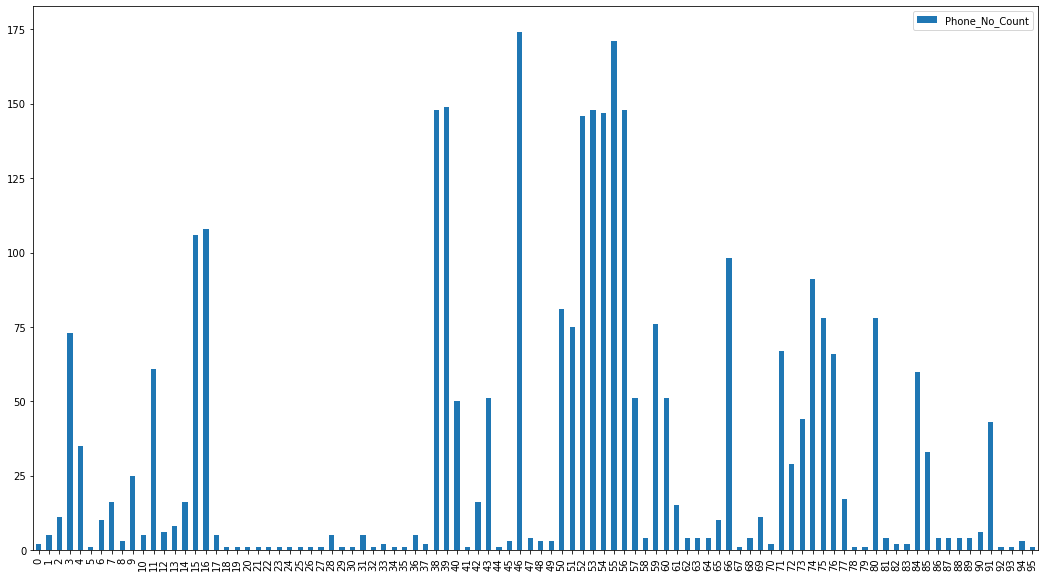

In [244]:
products_phn_df_count.plot(kind="bar", figsize=(18,10))

In [245]:
# merging dataframes
product_details = products_phn_df_count.merge(products_acc_df_count,how='left', on='PRODUCT_NAME')
product_details

,PRODUCT_NAME,Phone_Number.hash,Phone_No_Count,ACCOUNT_NUM.hash,Acc_No_Count
0,AB_Additional Distance,"[f4ddd9b3657e0c4a53ec796d45a12bab, 70831e8466d...",2,"[0ee5f78b81c7712241fd67cecdd45263, c310c8a2a64...",2
1,AB_Citylink Loyalty Rewards,"[c5722f1197db46f96000e28ef6c36da1, dde2f0e7268...",5,"[1138b4f14a87a3cdd9d0e9cc6986f281, a05dd4af2dc...",5
2,AB_Copper Access Bearer,"[ede1448200e175674b6979edac0c48e8, 63bbcf692bf...",11,"[93255ea78f65df684ace26d7d7884d80, 40fea6b7ad0...",11
3,AB_Megaline,"[2eb5aeccf29e5317936332e6787c605f, bfd697f1151...",73,"[3ec238485f292e3784987c0bb81b41d0, b0d2b72ebf1...",73
4,AB_Megaline Startup,"[b635fc31617ffc9c1e6b5015fb32e108, 8cc2085e88a...",35,"[a4e4afaedb57f205bfeff624c39fe49d, b130cd91df3...",35
...,...,...,...,...,...
91,V_Single VAS Bundle,"[b635fc31617ffc9c1e6b5015fb32e108, bfd697f1151...",43,"[a4e4afaedb57f205bfeff624c39fe49d, b0d2b72ebf1...",43
92,V_Sisu Connect,[182486ef8edf03ffee6d14a8943c2614],1,[56b6ed37e0621100f8768b156fa7b14a],1
93,V_Telehealth,[ae96c23b4702df9ff2d918e3b332407a],1,[0e2c5fa9861df3d00082338f6fccb892],1
94,V_Triple VAS Bundle,"[7b8e391e97781e1a70d3ffcdefa03136, c7e2c1483f3...",3,"[12565b41a78f681bca48f15e21c4b465, e6355ce1a74...",3


In [246]:
product_details.to_csv("data/user_profile/Phone_Nos_and_Account_nos_Per_Product.csv")